In [4]:
import pandas as pd

# Prepare GDP Data
gdp_per_capita = pd.read_csv("data/gdp-per-capita-maddison.csv")
gdp_per_capita.drop(columns=["Code", "900793-annotations"], inplace=True)
gdp_per_capita = gdp_per_capita.loc[gdp_per_capita["Year"] == 2022]
gdp_per_capita.drop(columns=["Year"], inplace=True)

# Prepare Life Index Data
life_index = pd.read_csv("data/BLI_14062024100018844.csv")
life_index = life_index.loc[life_index["INEQUALITY"] == "TOT"]
life_index = life_index.pivot(index="Country", columns="Indicator", values="Value")
# print(life_index)

pd.merge(gdp_per_capita, life_index, left_on="Entity", right_on="Country").to_csv("data/lifestat.csv", index=False)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Read Life Stat Data
lifestat = pd.read_csv("data/lifestat.csv")
lifestat = lifestat.dropna()

# Plot GDP vs Life Satisfaction
# lifestat.plot(kind="scatter", grid=True, x="GDP per capita", y="Life satisfaction")
# plt.show()

gdp_per_capita = lifestat[["GDP per capita"]]
life_index = lifestat[["Life satisfaction"]]

Prediction: [[6.6633209]]


/home/sunny/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


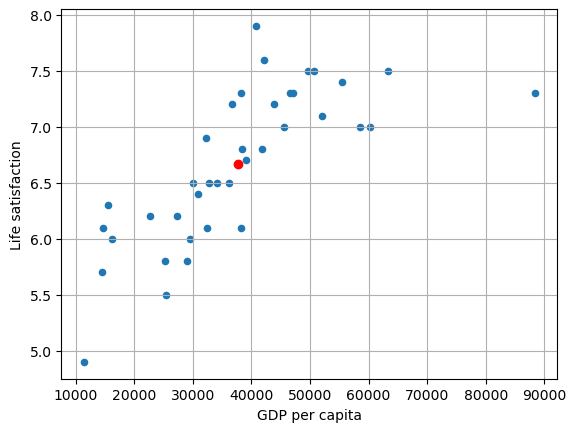

In [26]:
# Select Linear Regression Model
linear_model = LinearRegression()

# Train Model
linear_model.fit(X=gdp_per_capita, y=life_index)
# print(model.coef_, model.intercept_)

# Predict
gdp_per_capita_new = [[37655.2]]  # Random' GDP per capita
model_prediction = linear_model.predict(gdp_per_capita_new)
print("Prediction:", model_prediction)

# Plot GDP vs Life Satisfaction with predicted value
lifestat.plot(kind="scatter", grid=True, x="GDP per capita", y="Life satisfaction")
plt.scatter(gdp_per_capita_new[0][0], model_prediction, color='red')
plt.show()

Prediction: [[6.82]]


/home/sunny/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


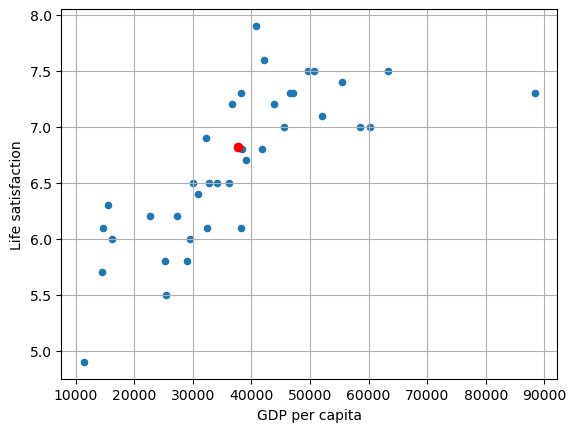

In [27]:
# Select Linear Regression Model
k_nearest_model = KNeighborsRegressor()

# Train Model
k_nearest_model.fit(X=gdp_per_capita, y=life_index)
# print(model.coef_, model.intercept_)

# Predict
gdp_per_capita_new = [[37655.2]]  # Random' GDP per capita
model_prediction = k_nearest_model.predict(gdp_per_capita_new)
print("Prediction:", model_prediction)

# Plot GDP vs Life Satisfaction with predicted value
lifestat.plot(kind="scatter", grid=True, x="GDP per capita", y="Life satisfaction")
plt.scatter(gdp_per_capita_new[0][0], model_prediction, color='red')
plt.show()